# Install libraries

## Sewar: for image quality assessment.

This code block installs the `sewar` library, which is used for image quality assessment.

In [ ]:
!pip install sewar

  Preparing metadata (setup.py) ... done
  Created wheel for sewar: filename=sewar-0.4.6-py3-none-any.whl size=11418 sha256=fdcc9e720f1742a1cb4f185a9d66b02922ee576f9550d1556afb792918781b7e
  Stored in directory: /root/.cache/pip/wheels/fb/4e/29/b15a3d425c5f0fe8f461cbfdaf4fa98ef203fed97ce1df6695
Successfully built sewar


# import required libraries

This code block imports all the necessary libraries for image processing, analysis, and visualization.

In [ ]:
import sys
# set_printoptions(threshold=sys.maxsize)
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
from sewar.full_ref import mse, rmse, psnr, uqi, ssim, ergas, scc, rase, sam, msssim, vifp
from matplotlib import pyplot as plt
import os
import datetime
import numpy as np
import random
import pandas as pd
from skimage import io

# Download Images
This code block downloads three images (`lake.jpg`, `peppers.jpg`, and `mandril.jpg`) from the provided URLs using the `wget` command. These images will be used as input for the image processing tasks.

In [ ]:
#!wget https://i.ibb.co/GxhRPnC/lake-512.jpg -O lake.jpg
#!wget https://i.ibb.co/D18bYP1/peppers-color.jpg -O peppers.jpg
#!wget https://i.ibb.co/2dckpJ9/mandril-color.jpg -O mandril.jpg
!wget https://i.postimg.cc/0yLDZZkp/Dark-RGB-2.jpg
#!wget https://i.postimg.cc/nh1BfWmZ/Dark-RGB-1.png
#!wget https://i.ibb.co/2StQxJm/bw.jpg -O bw.jpg

--2026-01-06 20:02:25--  https://i.postimg.cc/nh1BfWmZ/Dark-RGB-1.png
Resolving i.postimg.cc (i.postimg.cc)... 162.251.63.43
Connecting to i.postimg.cc (i.postimg.cc)|162.251.63.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 303333 (296K) [image/png]
Saving to: ‘Dark-RGB-1.png’

Dark-RGB-1.png      100%[===================>] 296.22K  1.21MB/s    in 0.2s    

2026-01-06 20:02:26 (1.21 MB/s) - ‘Dark-RGB-1.png’ saved [303333/303333]



This function `convert` performs a quantum-inspired transformation. It takes a 2x2 matrix `H` and a 2x1 state vector `i_state`, performs a dot product, and returns the two components of the resulting state vector.

In [ ]:
def convert (H,i_state):
    cov = np.dot(H,i_state)
    si = cov
    alpha=si[0][0]
    beta=si[1][0]
    return [alpha,beta]

This code block defines two functions:
- `conv_img3_arcsin(img)`: Resizes a grayscale image to 256x256, applies an "ISQR Encoding" (Inverse Square Root Encoding) using `arccos` and then converts the encoded values into a 2D representation, effectively expanding the image width.
- `conv_rgb3_arcsin(img)`: Takes an RGB image, converts it to BGR, resizes it to 256x256, applies `conv_img3_arcsin` to each color channel (blue, green, red) independently, and then recombines them into a new RGB image, effectively creating a "quantum-inspired" representation of the original image.

In [ ]:
def conv_img3_arcsin(img):
    small = cv2.resize(img,(256,256))
    converted = np.zeros((256,512))
    miny=np.amin(small)
    maxy=np.amax(small)
    #miny = 0
    #maxy = 255
    for i in range(0,len(small)):
        for j in range(0,len(small[0])):
            converted[i][j] = 2.0*np.arccos(np.sqrt((float(small[i][j])-float(miny))/(float(maxy)-float(miny)))) # ISQR Encoding
            H = np.array([[1,0],[0,1]])
            a1=np.cos(converted[i][j])
            a2=np.sin(converted[i][j])
            i_state= np.array([[a1],[a2]])
            c = convert(H,i_state)
            #list_st+=[c[0]**2 + c[1]**2]
            converted [i][2*j] = c[0]*255
            converted [i][2*j+1] = c[1]*255
            #converted[i][j]=small[i][j]
            #converted[i][j] = (float(small[i][j])/255)* math.degrees(90) # FRQI Encoding
            #print(small[i][j])
    return converted


def conv_rgb3_arcsin(img):
    #img = cv2.imread(fname)
    #print(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
    img = cv2.resize(img,(256,256))
    b, g, r    = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    b1, g1, r1 = conv_img3_arcsin(b), conv_img3_arcsin(g), conv_img3_arcsin(r)
    img = cv2.resize(img,(512, 256))
    img[:,:,0], img[:,:,1], img[:,:,2] = b1, g1, r1
    #print(img)
    return img

List out all the downloaded files

This code block lists all files in the current directory and prints their names.


In [ ]:
files = [f for f in os.listdir(".") if os.path.isfile(f)]
print(files)

['Dark-RGB-1.png']


This code block initializes an empty pandas DataFrame. It then iterates through a list of `files`, reads each image, resizes it to 256x256, displays the original image, applies the `conv_rgb3_arcsin` function (presumably for quantum-inspired encoding), displays the converted image, and saves the converted image as "quantum_rgb.png". This block appears to be for demonstrating the `conv_rgb3_arcsin` function on a set of images.

Dark-RGB-1.png


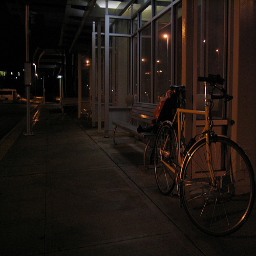

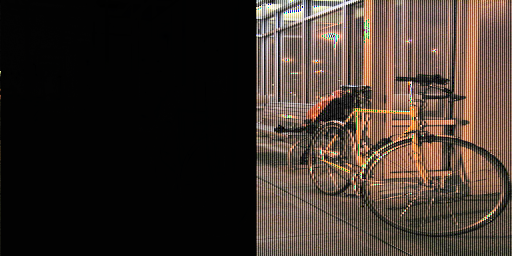

In [ ]:
df = pd.DataFrame()
for filey in files:
  img= cv2.imread(filey)
  print(filey)
  new1 = cv2.resize(img,(256,256))
  cv2_imshow(new1)
  conv2=conv_rgb3_arcsin(new1)
  cv2_imshow(conv2)
  cv2.imwrite("quantum_rgb.png",conv2)

This function `convert_a` takes a 2x2 matrix `H` and a 2x1 state vector `i_state`. It performs a dot product, extracts two components (`alpha`, `beta`), and then uses a probabilistic selection based on the squared magnitudes of `alpha` and `beta` to return either 0 or 255. This simulates a quantum measurement process where the outcome is probabilistic.

In [ ]:
def convert_a(H,i_state):
    cov = np.dot(H,i_state)
    si = cov
    alpha=si[0][0]
    beta=si[1][0]
    t=[alpha , beta]
    e=random.choices(t,weights=[alpha**2,beta**2],k=1)
    if e == alpha:
      c = 0*255
    else:
      c = 1*255
    return c

This code block defines two functions for quantum-inspired image encoding with a probabilistic measurement:
- `conv_img1(img, size=256)`: Resizes a grayscale image, applies an "ISQR Encoding" using `arccos`, and then uses the `convert_a` function to probabilistically assign a value (0 or 255) to each pixel, simulating a quantum measurement.
- `conv1_rgb(img, size1=256)`: Takes an RGB image, resizes it, and applies `conv_img1` to each color channel (blue, green, red) independently to create a new RGB image where each pixel value has undergone a probabilistic quantum measurement.

In [ ]:
def conv_img1(img,size=256):
    small = cv2.resize(img,(size,size))
    H = np.array([[1,0],[0,1]])
    converted = np.zeros((size,size))
    img = small
    miny=np.amin(small)
    maxy=np.amax(small)
    for i in range(0,len(small)):
        for j in range(0,len(small)):
            converted[i][j] = 2.0*np.arccos(np.sqrt((float(small[i][j])-float(miny))/(float(maxy)-float(miny)))) # ISQR Encoding
            H = np.array([[1,0],[0,1]])
            a1=np.cos(converted[i][j])
            a2=np.sin(converted[i][j])
            i_state= np.array([[a1],[a2]])
            c = convert_a(H,i_state)
            #list_st+=[c[0]**2 + c[1]**2]
            #converted [i][2*j] = c[0]*255
            converted [i][j] = c
            #converted[i][j]=small[i][j]
            #converted[i][j] = (float(small[i][j])/255)* math.degrees(90) # FRQI Encoding
            #print(small[i][j])

    return converted

def conv1_rgb(img,size1=256):
    img = cv2.resize(img,(size1,size1))
    b, g, r    = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    b1, g1, r1 = conv_img1(b,size=size1), conv_img1(g,size=size1), conv_img1(r,size=size1)
    img[:,:,0], img[:,:,1], img[:,:,2] = b1, g1, r1
    return img

This code block defines two functions for generating a "quantum-shot" averaged image:
- `convshots(img, shots=1, size=32)`: This function takes an RGB image, repeatedly applies `conv1_rgb` (which includes probabilistic measurements) for a specified number of `shots`, and then averages the results of these shots pixel by pixel to produce a restored image. This averaging helps reduce the noise introduced by the probabilistic measurements.
- `grey_convshots(img, shots=1)`: Similar to `convshots`, but designed for grayscale images. It repeatedly applies `conv_img3_arcsin` (which is deterministic in its encoding but used here with the intent of averaging if it were to be combined with a probabilistic measurement in a different setup), and then averages the results over multiple `shots`.

In [ ]:
def convshots(img,shots=1,size=32):
    img_list=[]
    for i in range(shots):
        conv2 = conv1_rgb(img,size1=size)
        img_list += [conv2]
    converted = np.zeros((size,size,3))
    sh = 0
    print(len(img),len(img[0]),len(img[0][0]))
    for i in range(0,len(img)):
         for j in range(0,len(img[0])):
             for k in range(0,len(img[0][0])):
                #val = {}
                val = 0
                for l in range(shots):
                    #print(i,j,k,l,img_list[l][i][j][k])
                    val += int(img_list[l][i][j][k])
                converted[i][j][k] = np.float64(val/shots)
                #print(sh)
                sh+=1
    return converted


def grey_convshots(img, shots=1, size=32):
    img_list=[]
    for i in range(shots):
        conv2 = conv_img1(img, size)
        img_list += [conv2]
    converted = np.zeros((size,size))
    sh = 0
    print(len(img),len(img[0]))
    for i in range(0,len(img)):
         for j in range(0,len(img[0])):
                #val = {}
                val = 0
                for l in range(shots):
                    #print(i,j,k,l,img_list[l][i][j][k])
                    val += int(img_list[l][i][j])
                converted[i][j] = np.float64(val/shots)
                #print(sh)
                sh+=1
    return converted



This code block lists all files in the current directory and prints their names.

In [ ]:
#files = [f for f in os.listdir(".") if os.path.isfile(f)]
print(files)

['Dark-RGB-1.png']


# Run convshots on all one dark images and get image analysis result
This code block iterates through the files in the current directory, loads each image, resizes it, and applies the `convshots` function with a varying number of shots (1, 10, 100). It then displays the converted image, saves it to a file, and calculates various image quality metrics (MSE, RMSE, PSNR, SSIM, UQI, MSSSIM, ERGAS, SCC, RASE, SAM) by comparing the restored image with the original. These metrics and the filename are stored in a pandas DataFrame. The code block was interrupted during execution.

Dark-RGB-1.png
Real Image 16 1:


16 16 3
Converted Image 16 1:


Real Image 16 10:


16 16 3
Converted Image 16 10:


Real Image 16 100:


16 16 3
Converted Image 16 100:


Real Image 32 1:


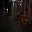

32 32 3
Converted Image 32 1:


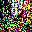

Real Image 32 10:


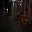

32 32 3
Converted Image 32 10:


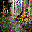

Real Image 32 100:


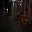

32 32 3
Converted Image 32 100:


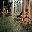

Real Image 64 1:


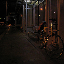

64 64 3
Converted Image 64 1:


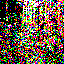

Real Image 64 10:


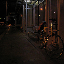

64 64 3
Converted Image 64 10:


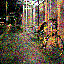

Real Image 64 100:


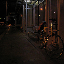

64 64 3
Converted Image 64 100:


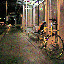

Real Image 128 1:


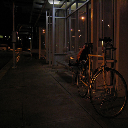

128 128 3
Converted Image 128 1:


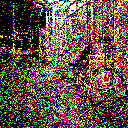

Real Image 128 10:


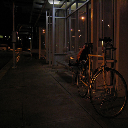

128 128 3
Converted Image 128 10:


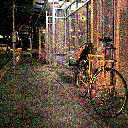

Real Image 128 100:


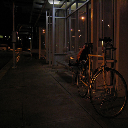

128 128 3
Converted Image 128 100:


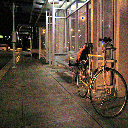

Real Image 256 1:


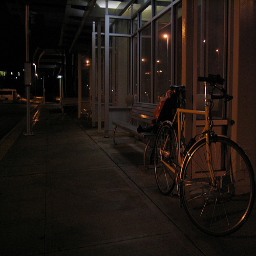

256 256 3
Converted Image 256 1:


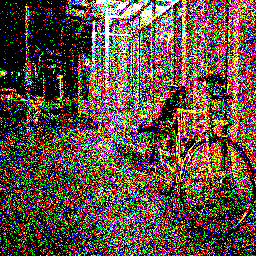

Real Image 256 10:


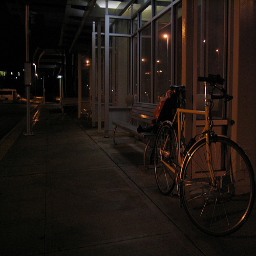

256 256 3
Converted Image 256 10:


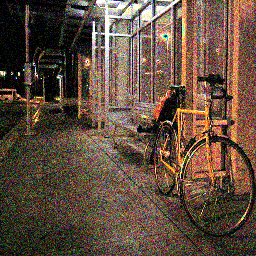

Real Image 256 100:


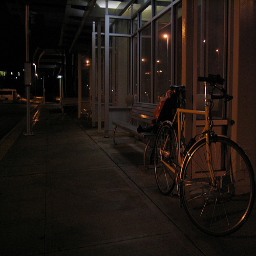

256 256 3
Converted Image 256 100:


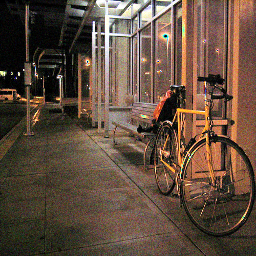

In [ ]:
df = pd.DataFrame()
for filey in files:
    print(filey)
    for img_size in (16, 32, 64, 128, 256):
      #for k in (1, 10, 100,1000):
      for k in (1, 10, 100):
          img = cv2.imread(filey)
          small = cv2.resize(img,(img_size,img_size))
          #small = cv2.cvtColor(small, cv2.COLOR_BGRA2GRAY)
          #small = cv2.cvtColor(small, cv2.COLOR_BGR2RGB)
          #plt.imsave(filey.split(".")[0]+"_real.jpg",small)
          # cv2.imwrite(filey.split(".")[0]+"_real.jpg",small)
          #real = cv2.imread(filey.split(".")[0]+"_real.jpg")
          real = small
          print(f"Real Image {img_size} {k}:")
          cv2_imshow(real)
          start = datetime.datetime.now()
          conv = convshots(real,k, img_size)
          end = datetime.datetime.now()
          #conv = cv2.cvtColor(conv, cv2.COLOR_BGR2RGB)
          print(f"Converted Image {img_size} {k}:")
          cv2_imshow(conv)
          #plt.imsave(filey.split(".")[0]+"_conv.jpg", conv)
          cv2.imwrite(filey.split(".")[0]+str(k)+f"_conv_a_{img_size}.jpg",conv)
          restored = cv2.imread(filey.split(".")[0]+str(k)+f"_conv_a_{img_size}.jpg")
          values = {
              "Name": filey,
              "size": img_size,
              "shots": k,
              "time": (end-start).total_seconds(),
              "MSE": np.round(mse(restored,real),3),
              "RMSE": np.round(rmse(restored, real),3),
              "PSNR": np.round(psnr(restored, real),3),
              "SSIM": (np.round(ssim(restored, real)[0],3),np.round(ssim(restored, real)[1],3)),
              "UQI": np.round(uqi(restored, real),3),
              "MSSSIM": np.round(msssim(restored, real).real,3),
              "ERGAS": np.round(ergas(restored, real),3),
              "SCC": np.round(scc(restored, real),3),
              "RASE": np.round(rase(restored, real),3),
              "SAM": np.round(sam(restored, real),3)
          }
          df = pd.concat([df,pd.DataFrame.from_dict([values])])

This code block displays the head of the DataFrame `df`, showing the first few rows of the collected image quality metrics.

In [ ]:
df.head()

,Name,size,shots,time,MSE,RMSE,PSNR,SSIM,UQI,MSSSIM,ERGAS,SCC,RASE,SAM
0,Dark-RGB-1.png,16,1,0.065793,12325.210,111.019,7.223,"(0.078, 0.164)",0.160,0.516,28.659,0.132,6935.981,0.768
0,Dark-RGB-1.png,16,10,0.554874,7060.831,84.029,9.642,"(0.202, 0.421)",0.212,0.624,22.579,0.527,5525.791,0.527
0,Dark-RGB-1.png,16,100,4.298839,7018.202,83.775,9.669,"(0.222, 0.473)",0.213,0.640,22.011,0.666,5426.971,0.489
0,Dark-RGB-1.png,32,1,0.174410,11046.140,105.101,7.699,"(0.084, 0.162)",0.171,0.400,28.505,0.340,7238.630,0.725
0,Dark-RGB-1.png,32,10,0.576677,6050.045,77.782,10.313,"(0.205, 0.402)",0.240,0.560,22.361,0.653,5521.548,0.468


This code block transposes the DataFrame `df`, swapping rows and columns.

In [ ]:
df = df.transpose()

This code block saves the transposed DataFrame `df` to a CSV file named 'Original-Restored Comparison.csv'.

In [ ]:
df.to_csv('Original-Restored Comparison.csv')

This code block reads the CSV file 'Original-Restored Comparison.csv' into a new pandas DataFrame named `df1`.

In [ ]:
df1 = pd.read_csv("Original-Restored Comparison.csv")

This code block displays the first 11 rows of the DataFrame `df1`.

In [ ]:
df1.head(13)

,Unnamed: 0,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14
0,Name,Dark-RGB-1.png,Dark-RGB-1.png,Dark-RGB-1.png,Dark-RGB-1.png,Dark-RGB-1.png,Dark-RGB-1.png,Dark-RGB-1.png,Dark-RGB-1.png,Dark-RGB-1.png,Dark-RGB-1.png,Dark-RGB-1.png,Dark-RGB-1.png,Dark-RGB-1.png,Dark-RGB-1.png,Dark-RGB-1.png
1,size,16,16,16,32,32,32,64,64,64,128,128,128,256,256,256
2,shots,1,10,100,1,10,100,1,10,100,1,10,100,1,10,100
3,time,0.065793,0.554874,4.298839,0.17441,0.576677,5.950984,0.389241,2.589347,24.378909,1.02684,9.506295,111.029826,4.854211,38.059246,379.483775
4,MSE,12325.21,7060.831,7018.202,11046.14,6050.045,5271.716,10747.91,5966.517,5468.997,9503.923,5006.079,4471.776,9086.222,4810.593,4323.214
5,RMSE,111.019,84.029,83.775,105.101,77.782,72.607,103.672,77.243,73.953,97.488,70.754,66.871,95.322,69.358,65.751
6,PSNR,7.223,9.642,9.669,7.699,10.313,10.911,7.818,10.374,10.752,8.352,11.136,11.626,8.547,11.309,11.773
7,SSIM,"(np.float64(0.078), np.float64(0.164))","(np.float64(0.202), np.float64(0.421))","(np.float64(0.222), np.float64(0.473))","(np.float64(0.084), np.float64(0.162))","(np.float64(0.205), np.float64(0.402))","(np.float64(0.268), np.float64(0.519))","(np.float64(0.074), np.float64(0.149))","(np.float64(0.191), np.float64(0.378))","(np.float64(0.261), np.float64(0.524))","(np.float64(0.071), np.float64(0.131))","(np.float64(0.193), np.float64(0.359))","(np.float64(0.295), np.float64(0.555))","(np.float64(0.064), np.float64(0.115))","(np.float64(0.179), np.float64(0.33))","(np.float64(0.295), np.float64(0.552))"
8,UQI,0.16,0.212,0.213,0.171,0.24,0.259,0.156,0.229,0.242,0.168,0.253,0.274,0.166,0.253,0.275
9,MSSSIM,0.516,0.624,0.64,0.4,0.56,0.603,0.345,0.497,0.538,0.323,0.498,0.562,0.316,0.504,0.593


# Run grey_convshot on one dark image in grayscale and get image analysis result
This code block iterates through the files in the current directory, loads each image, resizes it, and applies the `grey_convshots` function with a varying number of shots (1, 10, 100). It then displays the converted image, saves it to a file, and calculates various image quality metrics (MSE, RMSE, PSNR, SSIM, UQI, MSSSIM, ERGAS, SCC, RASE, SAM) by comparing the restored image with the original. These metrics and the filename are stored in a pandas DataFrame. The code block was interrupted during execution.

Dark-RGB-1.png
Real Image 16 1:


16 16
Converted Image 16 1:


Real Image 16 10:


16 16
Converted Image 16 10:


Real Image 16 100:


16 16
Converted Image 16 100:


Real Image 32 1:


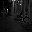

32 32
Converted Image 32 1:


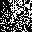

Real Image 32 10:


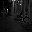

32 32
Converted Image 32 10:


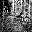

Real Image 32 100:


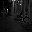

32 32
Converted Image 32 100:


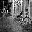

Real Image 64 1:


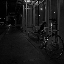

64 64
Converted Image 64 1:


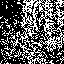

Real Image 64 10:


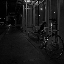

64 64
Converted Image 64 10:


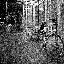

Real Image 64 100:


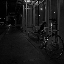

64 64
Converted Image 64 100:


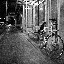

Real Image 128 1:


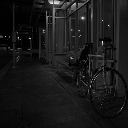

128 128
Converted Image 128 1:


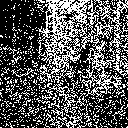

Real Image 128 10:


/usr/local/lib/python3.12/dist-packages/sewar/full_ref.py:242: RuntimeWarning: divide by zero encountered in divide
  rase_map = (100./M) * np.sqrt( np.sum(rmse_map**2,axis=2) / N )


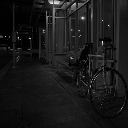

128 128
Converted Image 128 10:


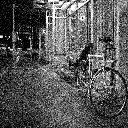

Real Image 128 100:


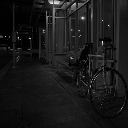

128 128
Converted Image 128 100:


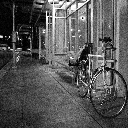

Real Image 256 1:


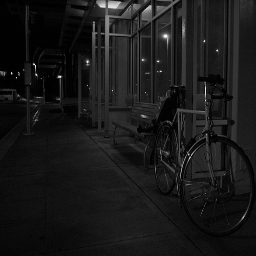

256 256
Converted Image 256 1:


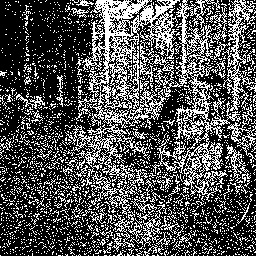

Real Image 256 10:


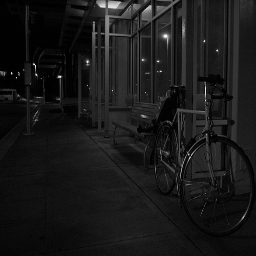

256 256
Converted Image 256 10:


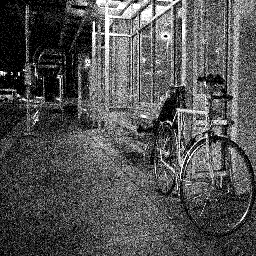

Real Image 256 100:


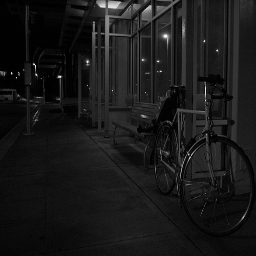

256 256
Converted Image 256 100:


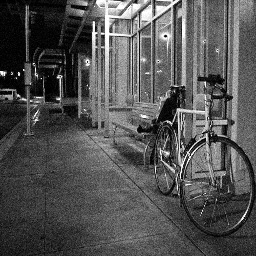

In [ ]:
df = pd.DataFrame()
for filey in files:
    print(filey)
    for img_size in (16, 32, 64, 128, 256):
      #for k in (1, 10, 100,1000):
      for k in (1, 10, 100):
          img = cv2.imread(filey)
          small = cv2.resize(img,(img_size,img_size))
          small = cv2.cvtColor(small, cv2.COLOR_BGR2GRAY)
          #small = cv2.cvtColor(small, cv2.COLOR_BGR2RGB)
          #plt.imsave(filey.split(".")[0]+"_real.jpg",small)
          # cv2.imwrite(filey.split(".")[0]+"_real.jpg",small)
          #real = cv2.imread(filey.split(".")[0]+"_real.jpg")
          real = small
          print(f"Real Image {img_size} {k}:")
          cv2_imshow(real)
          start = datetime.datetime.now()
          conv = grey_convshots(real,k, img_size)
          end = datetime.datetime.now()
          #conv = cv2.cvtColor(conv, cv2.COLOR_BGR2RGB)
          print(f"Converted Image {img_size} {k}:")
          cv2_imshow(conv)
          #plt.imsave(filey.split(".")[0]+"_conv.jpg", conv)
          cv2.imwrite(filey.split(".")[0]+str(k)+f"_conv_a_{img_size}.jpg",conv)
          restored = cv2.imread(filey.split(".")[0]+str(k)+f"_conv_a_{img_size}.jpg")
          restored = cv2.cvtColor(restored, cv2.COLOR_BGR2GRAY)
          values = {
              "Name": filey,
              "size": img_size,
              "shots": k,
              "time": (end-start).total_seconds(),
              "MSE": np.round(mse(restored,real),3),
              "RMSE": np.round(rmse(restored, real),3),
              "PSNR": np.round(psnr(restored, real),3),
              "SSIM": (np.round(ssim(restored, real)[0],3),np.round(ssim(restored, real)[1],3)),
              "UQI": np.round(uqi(restored, real),3),
              "MSSSIM": np.round(msssim(restored, real).real,3),
              "ERGAS": np.round(ergas(restored, real),3),
              "SCC": np.round(scc(restored, real),3),
              "RASE": np.round(rase(restored, real),3),
              "SAM": np.round(sam(restored, real),3)
          }
          df = pd.concat([df,pd.DataFrame.from_dict([values])])

In [ ]:
df.head()

,Name,size,shots,time,MSE,RMSE,PSNR,SSIM,UQI,MSSSIM,ERGAS,SCC,RASE,SAM
0,Dark-RGB-1.png,16,1,0.007354,19798.012,140.705,5.165,"(0.052, 0.114)",0.120,0.506,34.545,0.298,8405.869,0.844
0,Dark-RGB-1.png,16,10,0.053358,8151.664,90.287,9.018,"(0.165, 0.348)",0.212,0.629,23.553,0.480,5813.477,0.532
0,Dark-RGB-1.png,16,100,0.488141,7278.371,85.313,9.510,"(0.217, 0.459)",0.221,0.662,21.988,0.678,5475.036,0.462
0,Dark-RGB-1.png,32,1,0.042519,18175.489,134.817,5.536,"(0.043, 0.084)",0.124,0.338,36.398,0.270,9487.898,0.877
0,Dark-RGB-1.png,32,10,0.260995,8387.288,91.582,8.895,"(0.15, 0.321)",0.199,0.522,23.236,0.573,5887.427,0.493


In [ ]:
df = df.transpose()

In [ ]:
df.to_csv('Original-Restored Comparison -grayscale.csv')

In [ ]:
df1 = pd.read_csv("Original-Restored Comparison -grayscale.csv")

In [ ]:
df1.head(13)

,Unnamed: 0,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14
0,Name,Dark-RGB-1.png,Dark-RGB-1.png,Dark-RGB-1.png,Dark-RGB-1.png,Dark-RGB-1.png,Dark-RGB-1.png,Dark-RGB-1.png,Dark-RGB-1.png,Dark-RGB-1.png,Dark-RGB-1.png,Dark-RGB-1.png,Dark-RGB-1.png,Dark-RGB-1.png,Dark-RGB-1.png,Dark-RGB-1.png
1,size,16,16,16,32,32,32,64,64,64,128,128,128,256,256,256
2,shots,1,10,100,1,10,100,1,10,100,1,10,100,1,10,100
3,time,0.007354,0.053358,0.488141,0.042519,0.260995,1.849946,0.129141,1.276346,8.01181,0.359935,3.11802,32.126042,1.224467,12.661466,127.431967
4,MSE,19798.012,8151.664,7278.371,18175.489,8387.288,7013.602,18335.483,7495.073,6333.997,16956.421,6296.557,5144.949,16135.177,5643.85,4635.532
5,RMSE,140.705,90.287,85.313,134.817,91.582,83.747,135.409,86.574,79.586,130.217,79.351,71.728,127.024,75.126,68.085
6,PSNR,5.165,9.018,9.51,5.536,8.895,9.671,5.498,9.383,10.114,5.837,10.14,11.017,6.053,10.615,11.47
7,SSIM,"(np.float64(0.052), np.float64(0.114))","(np.float64(0.165), np.float64(0.348))","(np.float64(0.217), np.float64(0.459))","(np.float64(0.043), np.float64(0.084))","(np.float64(0.15), np.float64(0.321))","(np.float64(0.228), np.float64(0.484))","(np.float64(0.045), np.float64(0.086))","(np.float64(0.147), np.float64(0.302))","(np.float64(0.239), np.float64(0.495))","(np.float64(0.041), np.float64(0.074))","(np.float64(0.151), np.float64(0.287))","(np.float64(0.268), np.float64(0.516))","(np.float64(0.037), np.float64(0.065))","(np.float64(0.141), np.float64(0.256))","(np.float64(0.271), np.float64(0.507))"
8,UQI,0.12,0.212,0.221,0.124,0.199,0.221,0.119,0.207,0.231,0.122,0.231,0.263,0.121,0.239,0.275
9,MSSSIM,0.506,0.629,0.662,0.338,0.522,0.572,0.279,0.459,0.518,0.256,0.459,0.555,0.25,0.468,0.59
